# Wprowadzenie do obliczeń w Pythonie

## Ćwiczenia
Ćwiczenia należy wykonywać w środowisku Python 3. Instrukcję będą miały formę notatników Jupyter Notebook, ale same polecenia można wykonywać w dowolnym IDE (osoby znające Matlaba mogą skorzystać z edytora [Spyder](https://www.spyder-ide.org), który posiada układ podobny do produktu firmy Mathworks).
### Python vs Matlab
W kontekście obliczeń numerycznych oba środowiska są do siebie podobne. W 90% przypadków nazwy funkcji, kolejność argumentów i sposób rozwiązania danego problemu będą takie same w obu środowiskach. Istnieje jednak kilka różnic, o których należy pamiętać:
* Matlab jest narzędziem stworzonym specjalnie do obliczeń, Python to język programowania ogólnego przeznaczenia.
* W Pythonie do wykonywania obliczeń i wizualizacji wykorzystuje się biblioteki takie jak NumPy, SciPy, SymPy, Matplotlib, Seaborn itd. W Matlabie większość funkcjonalności jest dostępna "od ręki" (chociaż istnieją też płatne dodatki).
* W Matlabie tablice/macierze są indeksowane od **1** (tak jak np. w języku Pascal), w Pythonie pierwszy element kolekcji znajduje się na pozycji **0** (tak jak w większości języków programowania ogólnego przeznaczenia, np. C, C++, Java, Kotlin, Swift).
* Sposób mnożenia macierzy (temat zostanie poruszony na jednych z kolejnych zajęć).
Ciekawy zestaw przykładów pokazujący różnice pomiędzy Pythonem i Matlabem (a także Julią) znajdziecie Państwo na [tutaj](https://cheatsheets.quantecon.org).

# Obliczenia numeryczne w Pythonie

Podstawowym pakietem do obliczeń naukowych w Pythonie jest *numpy*. Zwyczajowo importuje się go w następujący sposób:

In [2]:
import numpy as np

**Uwaga.** Niektóre funkcje (np. *sqrt*) występują w więcej niż jednym pakiecie (np. *sqrt* znajduje się zarówno w *math*, jak i w *numpy*). W takich przypadkach zazwyczaj lepiej jest zastosować implementację z *numpy* (o ile jest dostępna).

In [3]:
import math
print(math.sqrt(2))
print((np.sqrt(2)))

1.4142135623730951
1.4142135623730951


## Typy proste

***Zadanie 1.***   
Oblicz wartości następujących formuł:
  
$k = 1240\sqrt{7}$  
$m = 2048$  
$l = 2j$  
$d = k+2m$  
$c = d+l$  
  
Po wykonaniu obliczeń sprawdź typy danych utworzonych zmiennych (funkcja *type*)

In [3]:
k = 1240*(math.sqrt(7))
m = 2048
l = 2j
d = k + (2*m)
c = d +l
print(k)
print(m)
print(l)
print(d)
print(c)

3280.7316257200923
2048
2j
7376.731625720093
(7376.731625720093+2j)


In [11]:
type(k)
type(m)
type(l)
type(d)
type(c)

complex

## Formatowanie wyjścia

W pracy z liczbami warto wykorzystać formatowanie stringów.


In [20]:
a = "hello"
'a = {a}, typ: {t}'.format(a = a, t = type(a))


"a = hello, typ: <class 'str'>"

W Pythonie 3.6+ dostępny jest również nowy format zwany *f-String*, który pozwala umieszczać wyrażenia do obliczenia bezpośrednio w łańcuchu.

In [17]:
f'a = {a}, typ: {type(a)}, 2 + 2 = {2+2}'

"a = hello, typ: <class 'str'>, 2 + 2 = 4"

Możliwe jest również sterowanie formatowaniem wartości [liczbowych](https://docs.python.org/3/tutorial/inputoutput.html):

In [18]:
# Dla typu float
print(f'a = {a}')
print(f'a = {a:.3f}')
print(f'a = {a:.50f}')

#Dla typu int
print()
print(f'b = {b}')
print(f'b = {b:10d}')
print(f'b = {b:20d}')

a = hello


ValueError: Unknown format code 'f' for object of type 'str'

## Typy tablicowe

W bibliotece standardowej Pythona brakuje typu tablicowego (jest jedynie lista), który przydaje się podczas pracy z danymi liczbowymi. Lukę tę wypełnia typ tablicowy z *numpy*. 

In [21]:
tab = np.array([1,2,3])
tab2 = np.array(([1.0,2],[3,4])) # argument w postaci krotki!
print(f'{tab}, typ: {type(tab)}')
print(f'{tab2}, typ: {type(tab2)}')

[1 2 3], typ: <class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]], typ: <class 'numpy.ndarray'>


Jak widać tablice w *numpy* są obiektami typu *ndarray*. Jest to homogeniczny typ tablicowy, czyli taki, który pozwala przechowywać jedynie dane tego samego typu (w każdej tablicy wszystkie elementy są jednego typu, tak jak np. w C). Dane heterogeniczne można przechowywać np. w strukturze *DataFrame* z biblioteki *Pandas*.
Obiekt typu *ndarray* posiada kilka interesujących atrybutów:
* *shape* — kształt tablicy, czyli krotka zawierająca liczbę elementów dla każdego wymiaru (osi) tablicy. Wymiary można również sprawdzić za pomocą *np.shape()*.
* *size* — sumaryczna liczba elementów.
* *ndim* — liczba wymiarów (osi).
* *nbytes* — liczba bajtów zajmowana przez obiekt.
* *dtype* — typ danych przechowywanych w tablicy. Można go jawnie określić podczas tworzenia tablicy (parametr dtype)
 

In [30]:
def printDetails(arr):
    print(f'   Tablica {arr}')
    print(f'   shape = {arr.shape}')
    print(f'   size = {arr.size}')
    print(f'   ndim = {arr.ndim}')
    print(f'   nbytes = {arr.nbytes}')
    print(f'   dtype = {arr.dtype}')
    print()

***Uwaga!*** W *numpy* dostępny jest też typ *matrix*. Jest on obecnie uznany za ,,przestarzały'' (ang. *deprecated*) i nie należy z niego korzystać (nawet w zastosowaniach numerycznych, co sugerowałaby jego nazwa).

In [31]:
printDetails(tab) # Uwaga na shape!
printDetails(tab2)



   Tablica [1 2 3]
   shape = (3,)
   size = 3
   ndim = 1
   nbytes = 12
   dtype = int32
   Tablica arr


AttributeError: 'str' object has no attribute 'shape'

#### Zmiana kształtu
Do zmiany kształtu tablic służy funkcja *reshape()*. Nowe wymiary muszą odpowiadać liczbie elementów w tablicy!

In [32]:
tab3 = tab.reshape(1,3)
printDetails(tab3)

tab4 = tab.reshape(10,3)



   Tablica [[1 2 3]]
   shape = (1, 3)
   size = 3
   ndim = 2
   nbytes = 12
   dtype = int32
   Tablica arr


AttributeError: 'str' object has no attribute 'shape'

#### Tworzenie tablic

Poza metodą *array*, tablice można utworzyć również z pomocą wielu innych [funkcji](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation) m.in.:
* *np.zeros()* — tworzy tablicę o zadanym rozmiarze wypełnioną zerami.
* *np.ones()* — tworzy tablicę o zadanym rozmiarze wypełnioną jedynkami.
* *np.identity()* — tworzy macierz identycznościową o zadanym rozmiarze.
* *np.eye()* — tworzy tablicę o zadanym rozmiarze z jedynkami na przekątnej.
* **np.linspace()** — tworzy tablicę z równomiernie rozmieszczonymi wartościami znajdującymi się pomiędzy określoną początkową i końcową wartością z użyciem określonej liczby elementów.
* *np.fromfile(), np.fromstring(), np.loadtxt()* — tworzy tablice na podstawie danych z plików lub stringów.

In [33]:
zeros = np.zeros((2,2))
print(zeros)

[[0. 0.]
 [0. 0.]]


In [34]:
ones = np.ones([5,10])
print(ones)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [35]:
np.identity(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [36]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
np.linspace(1,10,5) # Tablica 5 wartości rozmieszczonych równomiernie w przedziale [1,10]

## Operacje na macierzach

### Indeksowanie

In [37]:
A = np.array(([1,2,3],[4,5,6],[7,8,9]))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [38]:
A[1,1]

5

In [39]:
A[0,0]

1

In [40]:
A[0:2,0:1]

array([[1],
       [4]])

In [41]:
A[-1,-1]

9

In [42]:
A[A>5]

array([6, 7, 8, 9])

In [43]:
A[A%2==0]

array([2, 4, 6, 8])

In [44]:
B = A
B[B>5] = 37 # Indeksowanie wraz z przypisaniem nowej wartości
B

array([[ 1,  2,  3],
       [ 4,  5, 37],
       [37, 37, 37]])

### Operacje arytmetyczne

In [45]:
A = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12]))
B = np.array(([-1,-2,-3],[-4,-5,-6],[-7,-8,-9],[-10,-11,-12]))
C = np.array(([20,21,22,23],[24,25,26,27],[28,29,30,31]))

In [46]:
print(A)
print(B)
print(C)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ -1  -2  -3]
 [ -4  -5  -6]
 [ -7  -8  -9]
 [-10 -11 -12]]
[[20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [47]:
A+B

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
A-B

In [ ]:
B-A

In [48]:
A*B # Mnożenie odpowiadających sobie elementów!!

array([[  -1,   -4,   -9],
       [ -16,  -25,  -36],
       [ -49,  -64,  -81],
       [-100, -121, -144]])

In [ ]:
A/B # Dzielenie odpowiadających sobie elementów!!

In [49]:
A*C # Niepoprawne, wymiary nie są zgodne

ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [51]:
np.dot(A,C) # Mnożenie macierzowe macierzy

array([[152, 158, 164, 170],
       [368, 383, 398, 413],
       [584, 608, 632, 656],
       [800, 833, 866, 899]])

In [50]:
A @ C # Inny zapis, Python 3.5+

array([[152, 158, 164, 170],
       [368, 383, 398, 413],
       [584, 608, 632, 656],
       [800, 833, 866, 899]])

In [ ]:
A.T # Macierz transponowana

In [ ]:
np.transpose(A)

***Zadanie 2.***  
Zadeklaruj macierz 
$\mathbf{M} =\left[ \begin{matrix}
\sqrt{2} & 1 & -\sqrt{2}\\
0 & 1 & 1\\
-\sqrt{2} & \sqrt{2} & 1
\end{matrix}\right]
$    
Wyznacz numerycznie jej macierz odwrotną (*np.linalg.inv*) i transponowaną. Oblicz wyznacznik tej macierzy (*np.linalg.det()*). Wypisz otrzymane wyniki. 

In [7]:


m = np.array(([math.sqrt(2),1, -1*math.sqrt(2)],[0,1,1], [-1*math.sqrt(2), math.sqrt(2), 1] ))
print(m)
m_i = np.linalg.inv(m)
print(m_i)
m_t = np.transpose(m)
print(m_t)
det_m = np.linalg.det(m)
print(det_m)

[[ 1.41421356  1.         -1.41421356]
 [ 0.          1.          1.        ]
 [-1.41421356  1.41421356  1.        ]]


# Wizualizacja danych

Do wizualizacji wyników, tworzenia wykresów itd. wykorzystamy bibliotekę *matplotlib*, a konkretniej jej stanowe i obiektowe API zwane *pyplot*. Zwyczajowo importu dokonuje się w następujący sposób:

In [5]:
import matplotlib.pyplot as plt

Tworzenie wykresu rozpoczyna się od utworzenia "okna":

In [9]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Następnie można skorzystać z jednej z dostępnych metod wizualizacji. Do stworzenia wykresu potrzebne będą też dane. Funkcja *plt.plot()* pozwala wyświetlić dane przekazane w postaci tablic (np. tablic punktów X i Y).

In [10]:
X = np.linspace(0,2*np.pi, 1000)
Y = np.sin(X)

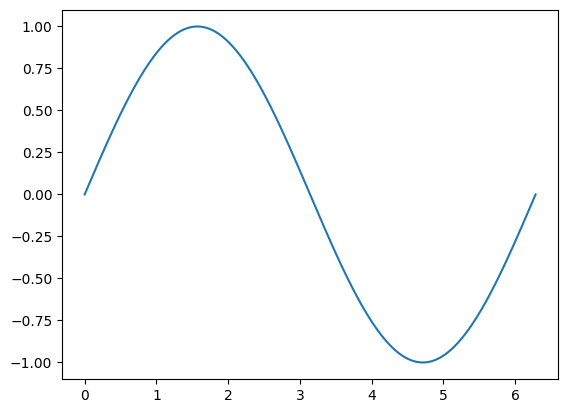

In [11]:
plt.plot(X,Y)

Wykresy można również personalizować.

Text(0, 0.5, 'sin(x)')

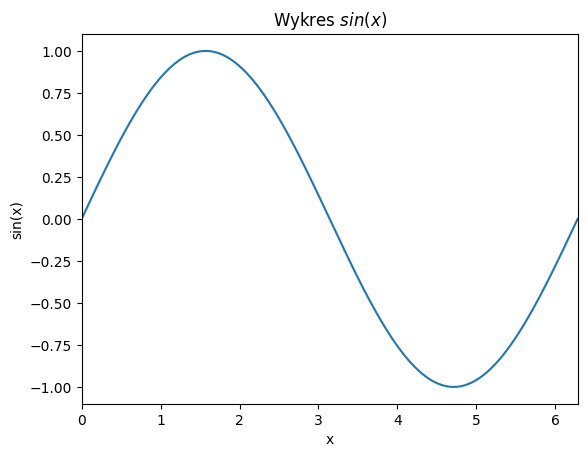

In [12]:
plt.plot(X,Y)
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


Na jednym wykresie można pokazać kilka ,,obiektów''. Możliwe jest również dodanie siatki i legendy (treści ,,matematyczne'' wstawiamy między dolarami).

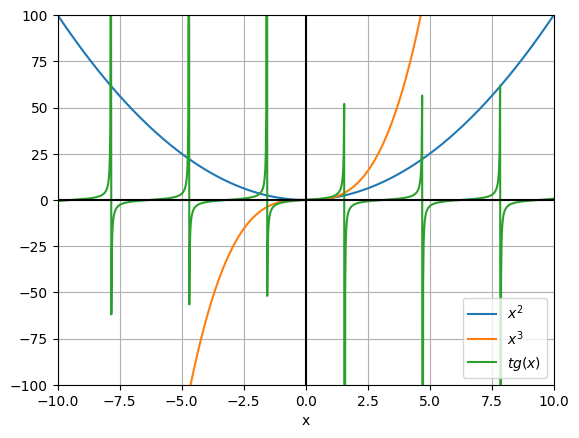

In [18]:
# plt.figure(figsize=(14,10)) # Stworzenie ,,większego'' okna
X = np.linspace(-10,10, 1000)

plt.plot(X,X**2, label = '$x^2$') # W argumencie label umieszcza się nazwy krzywych do legendy
plt.plot(X,X**3, label = '$x^3$')
plt.plot(X,np.tan(X), label = '$tg(x)$')
plt.xlim([-10,10])
plt.ylim([-100,100])
plt.xlabel('x')
plt.grid() # Wyświetlanie siatki
plt.legend() # Dodanie legendy
plt.axhline(y=0, color='k') # Dodanie osi x = 0
plt.axvline(x=0, color='k') # Dodanie osi y = 0

Dane na wykresie niekoniecznie muszą mieć formę krzywych

Text(0, 0.5, 'sin(x)')

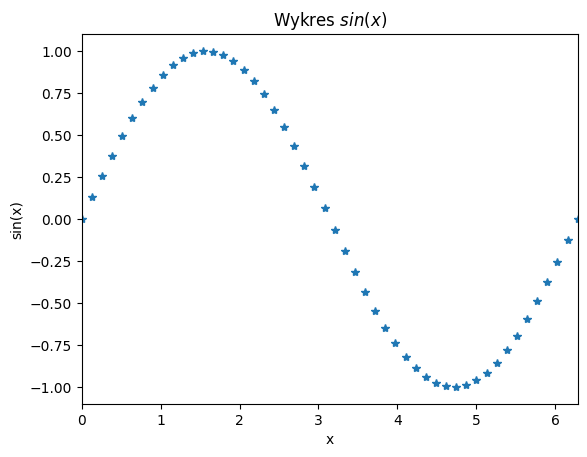

In [19]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), '*')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


Text(0, 0.5, 'sin(x)')

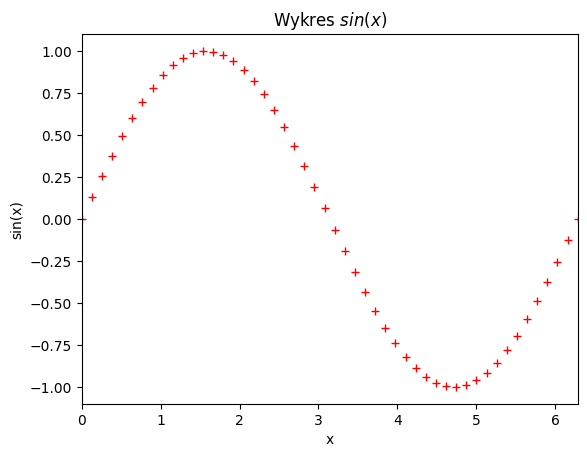

In [20]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), 'r+')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')

***Zadanie 3.***

Zdefinuj funkcję 
$f(x) = x^3 - 5x + 7$
i stwórz jej wykresy w przedziałach:
* $x\in<-1,1>$ 
* $x\in<-10,20>$

Spersonalizuj wykresy: dodaj tytuły, opisy osi etc.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


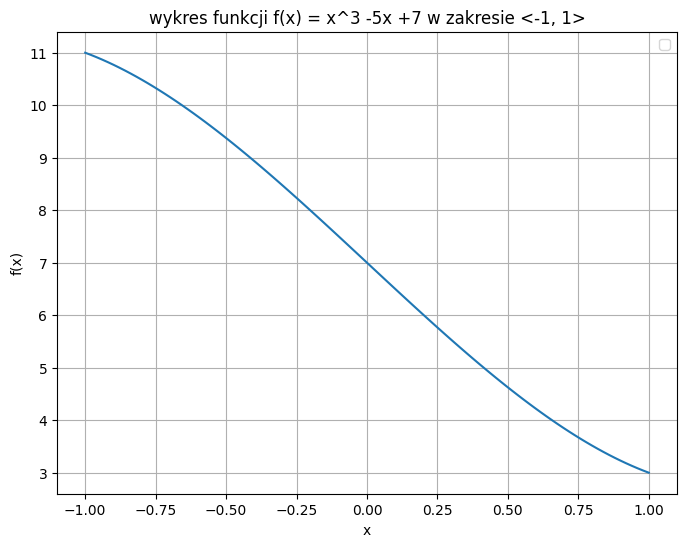

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


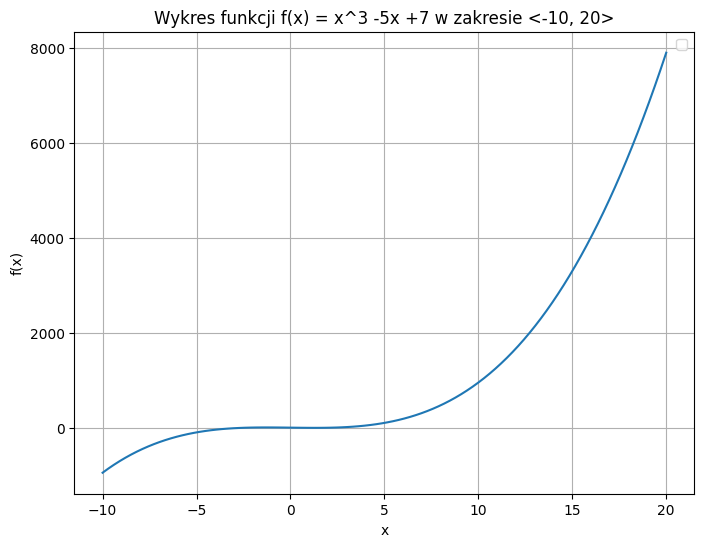

In [6]:
def f(x):
    return x**3 - 5*x + 7

x1 = np.linspace(-1, 1, 100)
y1 = f(x1)
plt.figure(figsize=(8, 6))
plt.plot(x1,y1)
plt.title("wykres funkcji f(x) = x^3 -5x +7 w zakresie <-1, 1>")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

x2 = np.linspace(-10,20,100)
y2 = f(x2)
plt.figure(figsize=(8, 6))
plt.plot(x2,y2)
plt.title("Wykres funkcji f(x) = x^3 -5x +7 w zakresie <-10, 20>")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Wizualizacja macierzy

W obliczeniach numerycznych często pojawia się potrzeba porównania zawartości dwóch macierzy lub wektorów. Jednym z prostych rozwiązań jest przedstawienie obu macierzy w postaci „graficznej”, w której kolory reprezentują wartości znajdujące się w macierzy.

Text(0.5, 1.0, 'Macierz B')

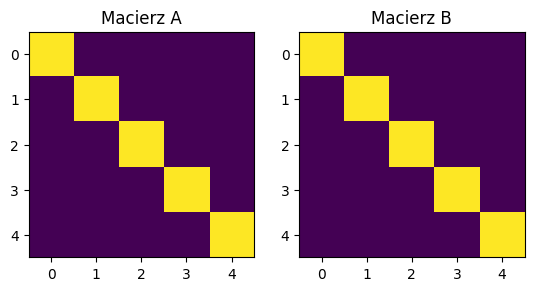

In [8]:
A = np.identity(5)
B = np.diag([1,1,1,1,1])

plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Macierz A')

plt.subplot(1,2,2)
plt.imshow(B)
plt.title('Macierz B')

Uwaga: kolorystykę można dostoswać za pomocą argumentu `cmap` (np. `cmap='gray'`)

***Zadanie 4.***

Zastanów się nad innymi sposobami porównywania macierzy. Jak można to zrobić, jak łatwo ocenić czy dwie macierze zawierają te same/podobne wartości?

In [9]:
import numpy as np
np.array_equal(A,B)

True

***Zadanie 5.***

Stwórz kwadratową macierz wartości losowych o wymarach 10x10. Następnie przeprowadź jej rozklad QR za pomocą funkcji [`scipy.linalg.qr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html) (sprawdź, w dokumentacji jak działa ta funkcja oraz jakie wartości zwraca). W wyniku rozkładu otrzymasz dwie macierze `Q` i `R` (szczegóły na jednych z kolejnych zajęć). Następnie przypisz macierz Q do zmiennej i wyznacz jej **transpozycję** ($Q^T$) oraz **odwrotność** ($Q^{-1}$). Porównaj ze sobą te dwie macierz. Jaki wynik otrzymałeś i dlaczego? Powtórz obliczenia kilkukrotnie dla macierzy o różnych rozmiarach.

In [41]:
import numpy as np
from scipy.linalg import qr

n = 10

A = np.random.rand(n, n)

Q, R = qr(A)

Q_transpose = np.transpose(Q)
Q_inverse = np.linalg.inv(Q)

are_equal_transpose = np.allclose(Q, Q_transpose)
are_equal_inverse = np.allclose(Q, Q_inverse)

print("Czy macierz Q jest równa swojej transpozycji?", are_equal_transpose)
print("Czy macierz Q jest równa swojej odwrotności?", are_equal_inverse)

[[ 3  1 11 11  6  8 12  5  4  4]
 [ 9  6  7  9  9 10  8  2 11  2]
 [10  4 11  4  2 12  6 10  6  7]
 [ 2  2  4  3 11  2  7  3  6  5]
 [11 13  6  5  2  2  3 14  1  9]
 [12 11  3  3  1  9  7 10  4  8]
 [11 12  1  8 14 13  9  1 12 13]
 [11 10  7  5 12 13  9  9 14 14]
 [ 2  3 13  4  8 12 11  5 11 11]
 [ 4 11  2  6  8 10  9  2 14  5]]
[[-0.11172584 -0.1761043  -0.49318418 -0.60218121 -0.3225017  -0.0608341
   0.27981359 -0.34481339  0.1606505  -0.14122012]
 [-0.33517752 -0.23142    -0.02717194 -0.40921493  0.01993777 -0.05796196
  -0.26782938  0.58319063 -0.48287305 -0.13091321]
 [-0.37241946 -0.52103814 -0.14814337  0.2521753  -0.10021069  0.2493127
  -0.20170044 -0.2127194  -0.03547286  0.58727695]
 [-0.07448389  0.01454954 -0.16823611 -0.05070508  0.5648297  -0.51590023
   0.43483628  0.02991074 -0.13446914  0.41245757]
 [-0.40966141  0.27795106 -0.03568526  0.23443707 -0.41599059 -0.65797064
  -0.26140909 -0.00345837  0.15604904  0.0038801 ]
 [-0.44690335 -0.01166708  0.25620542  0.22123